In [1]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
import scipy
import scipy.ndimage
import math
import colorsys
import cv2
%matplotlib inline

In [2]:
api_key = u'a7033c014ca7f7239257ce57479225cd'
api_secret = u'264b1aa9df3f6060'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [3]:
keyword = 'landscape'
dir_name = 'landscape'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

In [4]:
import os
if not os.path.exists(dir_name): 
    os.makedirs(dir_name) 
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)        


Making directory landscape


In [5]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])




In [6]:
import warnings
    
nimage = 800
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im = skimage.io.imread(file)
        
        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)
    
        # Save the image
        local_name = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,'landscape', i)  
        skimage.io.imsave(local_name, im2)      
        print(local_name)
        i = i + 1

    if (i >= nimage):     
        break

landscape/landscape_0000.jpg
landscape/landscape_0001.jpg
landscape/landscape_0002.jpg
landscape/landscape_0003.jpg
landscape/landscape_0004.jpg
landscape/landscape_0005.jpg
landscape/landscape_0006.jpg
landscape/landscape_0007.jpg
landscape/landscape_0008.jpg
landscape/landscape_0009.jpg
landscape/landscape_0010.jpg
landscape/landscape_0011.jpg
landscape/landscape_0012.jpg
landscape/landscape_0013.jpg
landscape/landscape_0014.jpg
landscape/landscape_0015.jpg
landscape/landscape_0016.jpg
landscape/landscape_0017.jpg
landscape/landscape_0018.jpg
landscape/landscape_0019.jpg
landscape/landscape_0020.jpg
landscape/landscape_0021.jpg
landscape/landscape_0022.jpg
landscape/landscape_0023.jpg
landscape/landscape_0024.jpg
landscape/landscape_0025.jpg
landscape/landscape_0026.jpg
landscape/landscape_0027.jpg
landscape/landscape_0028.jpg
landscape/landscape_0029.jpg
landscape/landscape_0030.jpg
landscape/landscape_0031.jpg
landscape/landscape_0032.jpg
landscape/landscape_0033.jpg
landscape/land

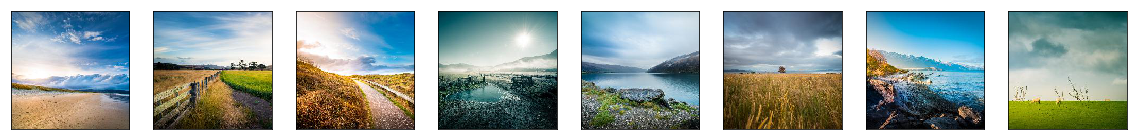

In [9]:
keyword = 'landscape'
plt.figure(figsize=(20,20))
nplot = 8
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(keyword,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)

In [11]:
img_a = np.zeros([nimage,224,224,3])
for i in range(nimage):
    inputImagePath = '{0:s}/{1:s}_{2:04d}.jpg'.format(keyword,keyword, i)  
    img_a[i] = cv2.imread(inputImagePath)
    
img_c = np.zeros([nimage,224,224,3])
d = np.zeros([nimage,224,224])
for i in range(nimage):
    d[i,:,:] = np.random.uniform(low=0.0, high=1.0, size=(224,224))
    t = np.exp(-d[i])
    a = 0.65
    b = 1
    A = np.random.uniform(low=a, high=b, size=(224,224))
    for k in range(0,3):
        img_c[i,:,:,k] = (img_a[i,:,:,k]/255)*t+A*(1-t)
    
    #cv2.imwrite("haze image/"+str(i)+".jpg", img_c[i]*255)


In [12]:
im=img_c*255
n = img_c.shape[0]
im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
im1 = im1.astype(np.uint8)
hsvI = im1

dc_max = np.zeros(img_c.shape[:3])
dc_min = np.zeros(img_c.shape[:3])
dc = np.zeros(img_c.shape[:3])
# dark = np.zeros(img_c.shape[:3])

for i in range(n):
    b,g,r = cv2.split(img_c[i])
    dc_min[i] = cv2.min(cv2.min(r,g),b)
    dc_max[i] = cv2.max(cv2.min(r,g),b)
    dc[i] =  dc_max[i] - dc_min[i] 
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(224,224))
#     dark[i] = cv2.erode(dc_min[i],kernel)
    
    hsvI[i] = cv2.cvtColor(im1[i], cv2.COLOR_BGR2HSV)
    
s = hsvI[:,:,:,1] / 255.0
v = hsvI[:,:,:,2] / 255.0

# s2 = s*s
# v2 = v*v



In [13]:
sr = s.reshape([nimage*224*224])
vr = v.reshape([nimage*224*224])
dr = d.reshape([nimage*224*224])
# s2r = s2.reshape([nimage*224*224])
# v2r = v2.reshape([nimage*224*224])
#dcr = dc.reshape([nimage*224*224])
#dar = dark.reshape([nimage*224*224])
dmr = dc_min.reshape([nimage*224*224])

In [14]:
X = np.ones([nimage*224*224,3])
X[:,0] = vr
X[:,1] = sr
X[:,2] = dmr

D = dr.T
D = np.mat(D).T

In [15]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X,dr)
print('regr.intercept=',regr.intercept_)
print('regr.coef=',regr.coef_)

regr.intercept= 0.448526013552
regr.coef= [ 0.51979753 -0.79006269 -0.26705365]


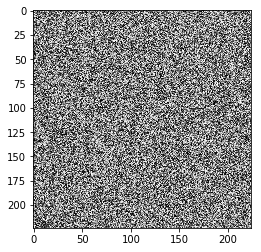

In [48]:
im = d[1]
im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
im1 = im1.astype(np.uint8)
plt.figure(1)
plt.imshow(im1,cmap='gray')